In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\krison dmello\Documents\MLProject\spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
df.info()

df['v1'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


v1
ham     4825
spam     747
Name: count, dtype: int64

C:\Users\krison dmello\AppData\Local\Temp\ipykernel_18772\46699980.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned['label'], palette='coolwarm')


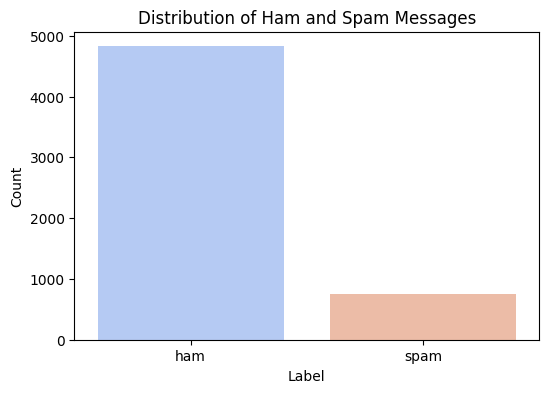

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop unnecessary columns
df_cleaned = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})

# Plot the distribution of labels
plt.figure(figsize=(6,4))
sns.countplot(x=df_cleaned['label'], palette='coolwarm')
plt.title("Distribution of Ham and Spam Messages")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


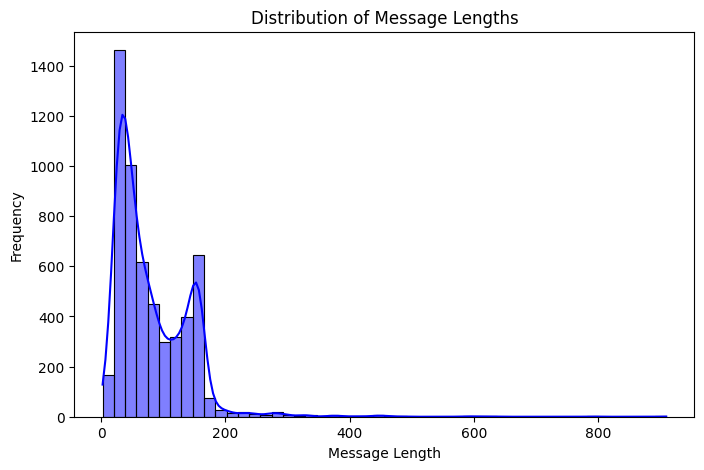

C:\Users\krison dmello\AppData\Local\Temp\ipykernel_18772\3200700535.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['label'], y=df_cleaned['message_length'], palette="coolwarm")


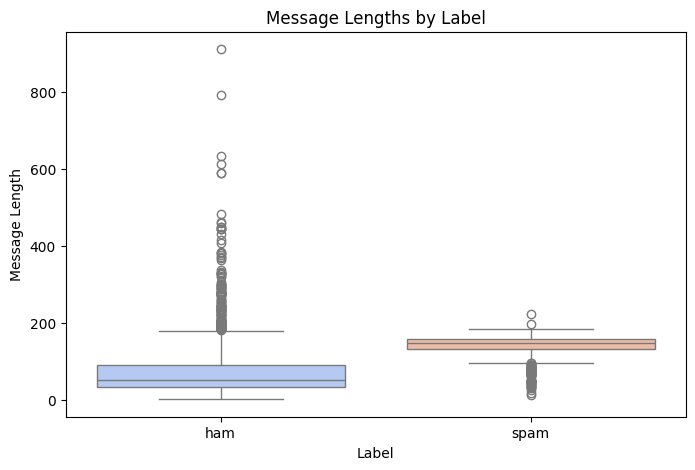

In [6]:
# Add a column for message length
df_cleaned['message_length'] = df_cleaned['message'].apply(len)

# Plot distribution of message lengths
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['message_length'], bins=50, kde=True, color='blue')
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()

# Compare message lengths for ham vs spam
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['label'], y=df_cleaned['message_length'], palette="coolwarm")
plt.title("Message Lengths by Label")
plt.xlabel("Label")
plt.ylabel("Message Length")
plt.show()

[nltk_data] Downloading package stopwords to C:\Users\krison
[nltk_data]     dmello\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
C:\Users\krison dmello\AppData\Local\Temp\ipykernel_18772\715262163.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=spam_df["word"], x=spam_df["count"], palette="Reds_r")


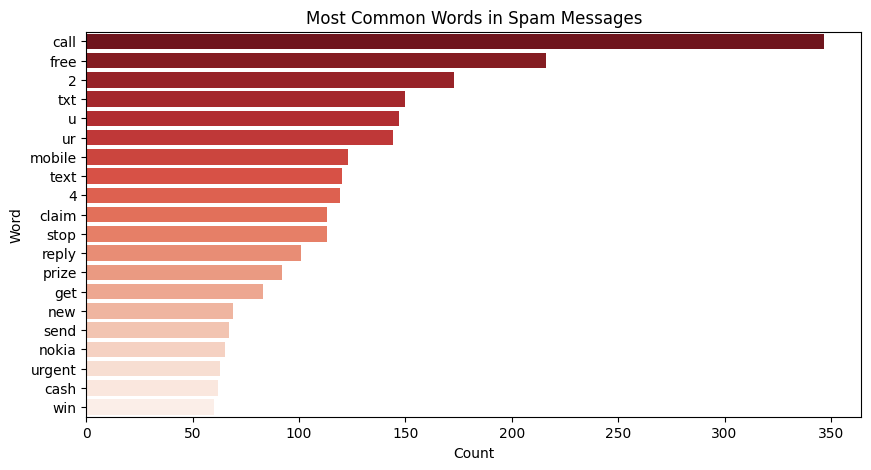

C:\Users\krison dmello\AppData\Local\Temp\ipykernel_18772\715262163.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=ham_df["word"], x=ham_df["count"], palette="Blues_r")


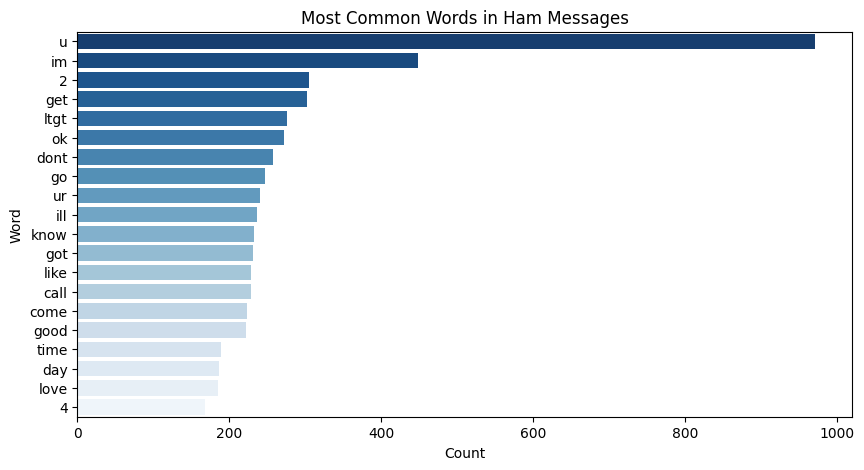

In [7]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords if not already present
nltk.download("stopwords")

# Function to preprocess text: remove punctuation, convert to lowercase, remove stopwords
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return words

# Separate spam and ham messages
spam_words = df_cleaned[df_cleaned["label"] == "spam"]["message"].apply(preprocess_text).sum()
ham_words = df_cleaned[df_cleaned["label"] == "ham"]["message"].apply(preprocess_text).sum()

# Get the most common words
spam_common = Counter(spam_words).most_common(20)
ham_common = Counter(ham_words).most_common(20)

# Convert to DataFrame for visualization
spam_df = pd.DataFrame(spam_common, columns=["word", "count"])
ham_df = pd.DataFrame(ham_common, columns=["word", "count"])

# Plot most common words in spam messages
plt.figure(figsize=(10, 5))
sns.barplot(y=spam_df["word"], x=spam_df["count"], palette="Reds_r")
plt.title("Most Common Words in Spam Messages")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

# Plot most common words in ham messages
plt.figure(figsize=(10, 5))
sns.barplot(y=ham_df["word"], x=ham_df["count"], palette="Blues_r")
plt.title("Most Common Words in Ham Messages")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

# Convert text labels to binary (ham = 0, spam = 1)
df_cleaned['label'] = df_cleaned['label'].map({'ham': 0, 'spam': 1})

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['message'], df_cleaned['label'], test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to avoid overfitting
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)
y_pred_dt = dt_model.predict(X_test_tfidf)
precision_dt = precision_score(y_test, y_pred_dt)

# Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
precision_lr = precision_score(y_test, y_pred_lr)

# Return precision scores
precision_dt, precision_lr

(0.9103448275862069, 0.991304347826087)

Precision Scores:
Decision Tree: 92.86%
Logistic Regression: 99.14%

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification reports
report_dt = classification_report(y_test, y_pred_dt, target_names=["Ham", "Spam"])
report_lr = classification_report(y_test, y_pred_lr, target_names=["Ham", "Spam"])

# Compute confusion matrices
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Display results
report_dt, conf_matrix_dt, report_lr, conf_matrix_lr

('              precision    recall  f1-score   support\n\n         Ham       0.98      0.99      0.98       965\n        Spam       0.91      0.88      0.89       150\n\n    accuracy                           0.97      1115\n   macro avg       0.95      0.93      0.94      1115\nweighted avg       0.97      0.97      0.97      1115\n',
 array([[952,  13],
        [ 18, 132]]),
 '              precision    recall  f1-score   support\n\n         Ham       0.96      1.00      0.98       965\n        Spam       0.99      0.76      0.86       150\n\n    accuracy                           0.97      1115\n   macro avg       0.98      0.88      0.92      1115\nweighted avg       0.97      0.97      0.96      1115\n',
 array([[964,   1],
        [ 36, 114]]))

Decision Tree Classifier:
Precision:
Ham: 98%
Spam: 93%
Recall:
Ham: 99%
Spam: 87%
F1-Score:
Ham: 98%
Spam: 90%

Logistic Regression Classifier:
Precision:
Ham: 96%
Spam: 99%
Recall:
Ham: 100%
Spam: 77%
F1-Score:
Ham: 98%
Spam: 86%


Key Insights:
Decision Tree has better recall for spam (87% vs. 77%), meaning it detects more spam messages correctly.
Logistic Regression has higher precision for spam (99% vs. 93%), meaning fewer false positives.
Both models achieve 97% accuracy, but Logistic Regression is better at avoiding false spam detections.